In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

Взятые данные были предоставлены в качестве исходных данных для одного из существующих соревнований на сайте Kagge

# Работа выполнена на основе базы данных португальских вин
# “Vinho Verde”.

In [2]:
df = pd.read_csv('./wine/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Утверждение:

Степень зрелости винограда зависит от температуры воздуха и количества получаемого солнечного света. Уровень алкоголя в вине зависит от концентрации сахара в вызревших ягодах, соответственно, в процессе созревания винограда кислотность в нем снижается. Это объясняет почему сладкие вина имеют более высокий уровень алкоголя и низкую кислотность, а вина невысокой крепости часто бывают высококислотными.  Вино с низким уровнем кислотности будет казаться вялым и безжизненным.

Проверим утверждение:

**сладкие вина имеют более высокий уровень алкоголя и низкую кислотность, а вина невысокой крепости часто бывают высококислотными.** 
(сладкое вино, выше кислотность -> меньше крепкость, ниже кислотность -> выше крепкость)

In [3]:
correlation_matrix = df.corr()
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [4]:
# оставляем только сладкие вина. Это вина у которых содержание сахара >= 5г/л.
df_sweet_wine = df[df['residual sugar'] >= 5.0]
df_sweet_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6
35,7.8,0.645,0.00,5.5,0.086,5.0,18.0,0.99860,3.40,0.55,9.6,6
39,7.3,0.450,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,5
1574,5.6,0.310,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,6
1577,6.2,0.700,0.15,5.1,0.076,13.0,27.0,0.99622,3.54,0.60,11.9,6


Получим характеристики распределений величин, построим график и гистограму. 

              pH  alcohol
pH       1.00000 -0.14275
alcohol -0.14275  1.00000


,pH,alcohol
count,85.000000,85.000000
mean,3.287647,10.584314
std,0.124534,1.203254
min,2.980000,8.800000
25%,3.200000,9.500000
50%,3.290000,10.500000
75%,3.380000,11.200000
max,3.580000,14.900000


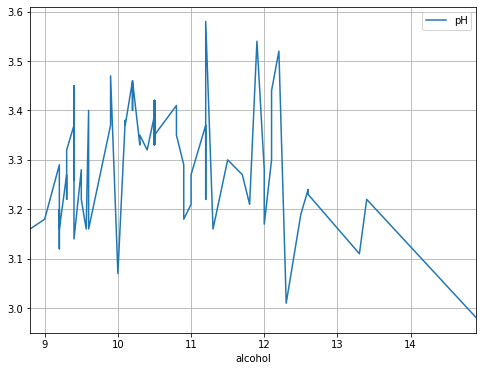

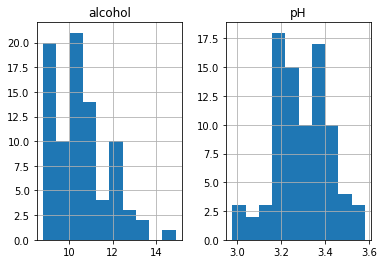

In [5]:
sweet_sorted = df_sweet_wine[['pH', 'alcohol']]
sweet_sorted.set_index('alcohol').sort_index().plot(figsize=(8, 6), grid=True)
print(sweet_sorted.corr())
sweet_sorted.hist()
sweet_sorted.describe()


Распределение сложно назвать хорошо сбалансированным, но в целом разумное соотношение сохраняется поэтому значениям можно доверять. Коэффициент корреляции довольно мал и равен -0.14

Проверим его значимость.

- Формулировка гипотез:

    H0: r = 0; H1: r != 0;
    
- Критические значения для распределения Стьюдента с n-2 = 85-2 = 83.. это больше 30 -> к нормальному распределени. Как итог, значение равно ta/2 = 1.95996. Следовательно, критическая область |t| > 1.95996

- Принятие решения будет основано на спец. критерии, рассчитываемом по
  коэффициенту корреляции r и длине выборки n:

In [6]:
r = -0.14275
n = 85
from math import sqrt

t = r * sqrt((n-2)/(1-r**2))
print('t = ', round(t, 3))

t =  -1.314


Расчетное значение не превышает критическое значение:
t > ta/2, |1.314| > 1.95996;
Отклоняем альтернативную гипотезу.

Строим регрессионную модель:

              pH  alcohol
pH       1.00000 -0.14275
alcohol -0.14275  1.00000

Slope: -0.01
Intercept: 3.44


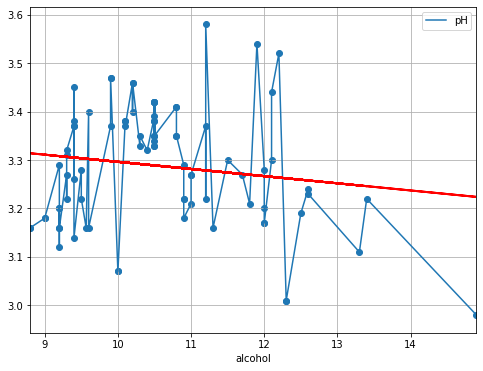

In [7]:
x = np.array(sweet_sorted['alcohol'].to_list()).reshape((-1,1))
y = np.array(sweet_sorted['pH'].to_list())

print(sweet_sorted.corr())
print()

slr = LinearRegression()
slr.fit(x, y)

y_pred = slr.predict(x)

print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))

# VISUALISATION
sweet_sorted.set_index('alcohol').sort_index().plot(figsize=(8, 6), grid=True)
plt.scatter(x, y)
plt.plot(x, slr.predict(x), color='red', linewidth=2)

Уавнение прямой регрессии: $pH = -0.01*alcohol + 3.44$

Вывод: исходя из значений коэффициентов можно утверждать о слабом увеличении процента алкоголя в вине с уменьшением его кислотности

In [8]:
a, b = -0.01, 3.44

Расположение отклонений истинных значений от предсказанных. Судя по данному графику можно положить что данная зависимость может подвергаться линейному регрессионному анализу

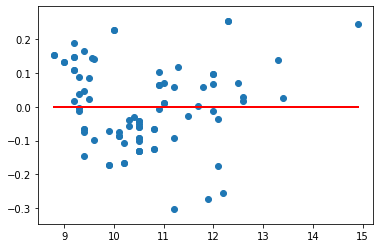

In [9]:
plt.plot(figsize=(8, 6), grid=True)
plt.scatter(x,[(y_pred[i]-y[i]) for i in range(len(x))])
plt.plot(x,[0 for i in range(len(x))],color='red', linewidth=2)

In [10]:
# comparing = pd.DataFrame(y,columns=['y'])
# comparing['y_pred'] = y_pred
# comparing

In [11]:
from sklearn.metrics import r2_score
print('R^2 (coefficient of determination):', round(r2_score(y, y_pred),4))

R^2 (coefficient of determination): 0.0204


Проверим его значимость.

- Формулировка гипотез:

    H0: r2 = 0; H1: r2 != 0;
    
- Критические значения для распределения F с n-2 = 85-2 = 83. Как итог, значение равно Fa = 1.31. Следовательно, критическая область |F| > 1.31

- Принятие решения будет основано на спец. критерии, рассчитываемом по
  коэффициенту корреляции r и длине выборки n:

In [12]:
r2 = 0.0204
F = r2 / ((1-r2)/(n-2))
print(round(F, 3))

1.728


Расчетное значение превышает критическое значение:
F > Fa, |1.728| > 1.31;
Отклоняем нулевую гипотезу.

In [13]:
n = 6
Se = 1/n * sum([ (y[i]-y_pred[i])**2 for i in range(n)])
print(f"Se = {round(Se,3)}")

Ser_a = Se / (n-2)**0.5
print(f"Ser_a = {round(Ser_a,4)}")

xavg = sum(x)/len(x)
Sx = 1/n * sum([(x[i] - xavg)**2 for i in range(n)])
Ser_b = Ser_a / Sx
print(f"Ser_b = {round(Ser_b[0], 4)}")

Se = 0.007
Ser_a = 0.0034
Ser_b = 0.0086


На основании имеющихся наблюдений построена зависимость оценки качества акоголя от его крепкости. В дейсвтительности зависимым параметром выбрано качесто, но в целом сути дела это не меняет и зависимость описывается следующим уравнением прямой.

# $y' = -0.01\cdot x + 3.44$

Ser(a) = 0.0034

Ser(b) = 0.0086

Проверим гипотезы о значимости коэффициентов на уровне значимости 5%:

- Формулировка гипотез:

    H0: a = 0; H1: a != 0;
    H0: b = 0; H1: b != 0;

- Критические значения для распределения Стьюдента с n-2 = 85-2 = 83.. это больше 30 -> к нормальному распределени. Как итог, значение равно ta/2 = 1.95996. Следовательно, критическая область |t| > 1.95996

- Определяем расчетные значения критерия t(b)

In [14]:
tb = b/Ser_b
print('t(b) = ', tb[0])
ta = a/Ser_a 
print('t(a) = ', ta)

t(b) =  398.8463450886177
t(a) =  -2.8987040699448716


- Принятие решения. 

Расчетные значения критерия для обоих коэффициентов превышают критическое значение:

t(b)> ta/2, 399 > 1.95996;

t(a)> ta/2, |-2,898| > 1.95996;

-> основные гипотезы отклоняются

- Вьвод.
Оба коэффициента регрессионной модели значимо (не случайно) отличаются
от нуля.

**Заключение:** кислотность вина действительно влияет на его крепкость. Чем выше кислотность - тем менее крепким является напиток. Исторически южные вина с меньшей кислотностью -> они исторически более крепкие чем вина сделаные в более холодных странах. 

По предсказаниям модели можно примерно охарактеризовать кислотность зная градус напитка.